<a href="https://colab.research.google.com/github/mint-rin/SeSAC/blob/main/topic_modeling_LSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
docs = ['바나나 사과 포도 포도',
         '사과 포도',
         '포도 바나나',
         '짜장면 짬뽕 탕수육',
         '볶음밥 탕수육',
         '짜장면 짬뽕',
         '된장찌개 김치찌개 김치 비빔밥',
         '김치 된장 비빔밥',
         '비빔밥 김치',
         '사과 볶음밥 김치 된장']

In [2]:
# 행렬 만들기
from sklearn.feature_extraction.text import TfidfVectorizer   # CounterVectorizer 써도 됨
# 행렬 분해
from sklearn.decomposition import TruncatedSVD

In [3]:
n_topic = 3

# 선언
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(docs)
svd = TruncatedSVD(n_components = n_topic)
u_sigma = svd.fit_transform(tfidf)
svd.components_

array([[ 0.39094311,  0.08663945,  0.2634605 ,  0.08663945,  0.31533599,
         0.1677167 ,  0.33012626,  0.42118555,  0.01907605,  0.01907605,
         0.05422822,  0.58747296],
       [ 0.49683512,  0.13720069,  0.26962551,  0.13720069, -0.29774469,
         0.10773075,  0.49275818, -0.18567019,  0.02131272,  0.02131272,
         0.04450862, -0.51222803],
       [-0.06285924, -0.02901254, -0.00762375, -0.02901254, -0.01957621,
         0.19210545, -0.09004258,  0.00851823,  0.60658392,  0.60658392,
         0.46061907, -0.02794911]])

In [4]:
vocab = tfidf_vect.get_feature_names_out()
n=3
for idx, topic in enumerate(svd.components_):
  print("Topic %d:" % (idx), [(vocab[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])

Topic 0: [('포도', 0.58747), ('사과', 0.42119), ('김치', 0.39094)]
Topic 1: [('김치', 0.49684), ('비빔밥', 0.49276), ('된장', 0.26963)]
Topic 2: [('짬뽕', 0.60658), ('짜장면', 0.60658), ('탕수육', 0.46062)]


# 단어 벡터 간의 상관관계

In [5]:
# 단어 벡터
for i in range(len(vocab)):
  print("{} : {}".format(vocab[i], svd.components_.T[i]))

김치 : [ 0.39094311  0.49683512 -0.06285924]
김치찌개 : [ 0.08663945  0.13720069 -0.02901254]
된장 : [ 0.2634605   0.26962551 -0.00762375]
된장찌개 : [ 0.08663945  0.13720069 -0.02901254]
바나나 : [ 0.31533599 -0.29774469 -0.01957621]
볶음밥 : [0.1677167  0.10773075 0.19210545]
비빔밥 : [ 0.33012626  0.49275818 -0.09004258]
사과 : [ 0.42118555 -0.18567019  0.00851823]
짜장면 : [0.01907605 0.02131272 0.60658392]
짬뽕 : [0.01907605 0.02131272 0.60658392]
탕수육 : [0.05422822 0.04450862 0.46061907]
포도 : [ 0.58747296 -0.51222803 -0.02794911]


In [10]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

# 코사인 유사도
def cosine_similarity(a, b):
  return dot(a, b)/(norm(a)*norm(b))

# 코사인 유사도를 사용해서 행렬의 유사도 구학
def calc_similarity_matrix(vectors):
  n_word = len(vectors)
  similarity_matrix = np.zeros((n_word, n_word))

  for i in range(n_word):
    # 위에서 정의한 코사인 유사도 사용
    for j in range(i, n_word):
      similarity_matrix[j, i] = cosine_similarity(vectors[i], vectors[j]).round(4)

    return similarity_matrix

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_similarity(similarity_matrix):
  uniform_data = similarity_matrix
  mask = np.triu(np.ones_like(similarity_matrix, dtype = np.bool))
  plt.rcParams['figure.figsize'] = [8, 6]
  ax = sns.heatmap(uniform_data, mask=mask,
                   annot = True, fmt = ".2f",
                   annot_kws = {'size':8},
                   cmap='coolwarm')

In [12]:
print(vocab)

['김치' '김치찌개' '된장' '된장찌개' '바나나' '볶음밥' '비빔밥' '사과' '짜장면' '짬뽕' '탕수육' '포도']


<ipython-input-11-dc05fe0ead2b>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(similarity_matrix, dtype = np.bool))


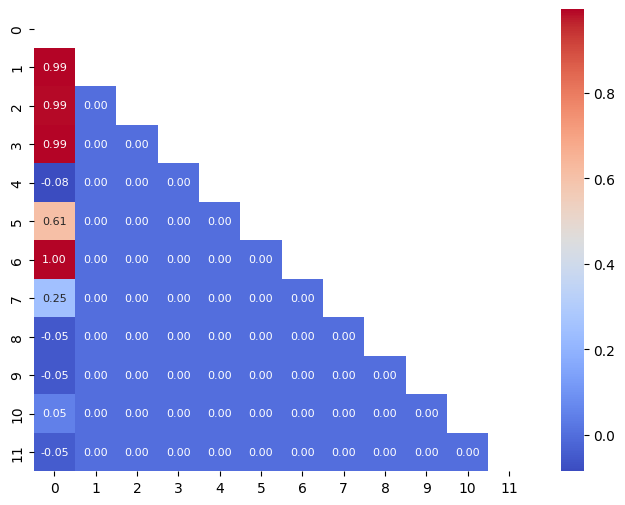

In [13]:
word_vectors = svd.components_.T
word_similarity_matrix = calc_similarity_matrix(word_vectors)
visualize_similarity(word_similarity_matrix)

# 단어 벡터 시각화

In [14]:
# 한글 폰트 설정
# 설치하고 한글 적용이 안 된다면, 런타임 > 런타임 다시시작 하고 설치코드 제외하고 나머지 코드 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,553 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120875 files and dire

In [20]:
%matplotlib inline
import matplotlib.font_manager as fm
import matplotlib
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=12)

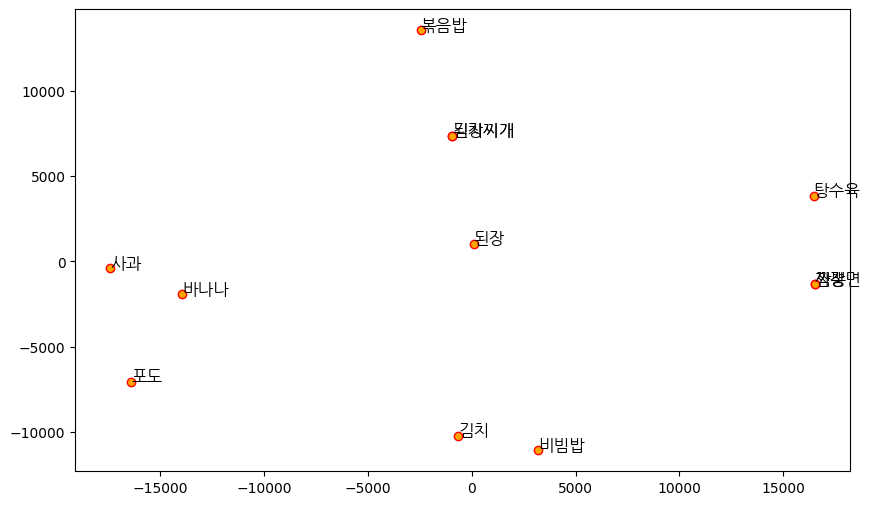

In [21]:
from sklearn.manifold import TSNE
import numpy as np
vectors = word_vectors
labels = tfidf_vect.get_feature_names_out()

def visualize_vectors(vectors, labels):
  tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
  np.set_printoptions(suppress=True)
  T = tsne.fit_transform(vectors)

  plt.figure(figsize=(10,6))
  plt.scatter(T[:,0], T[:,1], c='orange', edgecolors='r')
  for label, x, y in zip(labels, T[:,0], T[:,1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0,0),textcoords = 'offset points', fontproperties = fontprop)

visualize_vectors(vectors, labels)